情緒分數及etf的相關係數
1. 讀入股市及情緒總資料
2. 找出台灣有開市當天的情緒資料
3. 製作成散佈圖
4. 計算相關係數
5. 找出情緒分數特別高的時段，並以周為單位整理出對應的情緒分數絕對值較高的日期
6. 製作成散佈圖
7. 計算相關係數

In [3]:
#----------------回歸分析
import pickle
with open('C:\\Users\\Will\\Desktop\\datascience_upload\\專案\\情緒分數與台灣股票資料.pickle', 'rb') as file:
    date_stock_dict =pickle.load(file)
print(date_stock_dict['2019-02-03'])

{'emotion_score': 0.0, '0054': {'成交股數': '0', '開盤價': '0', '收盤價': '0', '漲跌價差': '0', '成交筆數': '0'}, '0053': {'成交股數': '0', '開盤價': '0', '收盤價': '0', '漲跌價差': '0', '成交筆數': '0'}, '0052': {'成交股數': '0', '開盤價': '0', '收盤價': '0', '漲跌價差': '0', '成交筆數': '0'}, '0059': {'成交股數': '0', '開盤價': '0', '收盤價': '0', '漲跌價差': '0', '成交筆數': '0'}, '2330': {'成交股數': '0', '開盤價': '0', '收盤價': '0', '漲跌價差': '0', '成交筆數': '0'}, '1303': {'成交股數': '0', '開盤價': '0', '收盤價': '0', '漲跌價差': '0', '成交筆數': '0'}, '1301': {'成交股數': '0', '開盤價': '0', '收盤價': '0', '漲跌價差': '0', '成交筆數': '0'}, '2882': {'成交股數': '0', '開盤價': '0', '收盤價': '0', '漲跌價差': '0', '成交筆數': '0'}, '2317': {'成交股數': '0', '開盤價': '0', '收盤價': '0', '漲跌價差': '0', '成交筆數': '0'}}


In [4]:
import xlrd
import datetime,time
file_r = 'C:\\Users\\Will\\Desktop\\datascience_upload\\專案\\每日情緒分數.xlsx'
book_r = xlrd.open_workbook(file_r,encoding_override="utf-8")
emotion_date_list = []
sheet_1 = book_r.sheet_by_index(0)
for i in range(313):
    date = datetime.datetime.utcfromtimestamp((sheet_1.cell_value(rowx=i,colx=0)-25569)*86400)
    date = date.strftime('%Y-%m-%d')
    emotion_date_list.append(date)
print(len(emotion_date_list))

313


In [5]:
import pickle
stock_name_list = ['元大台商0054','元大電子0053','富邦科技0052','富邦金融0059','台積電2330','鴻海2317','南亞1303','台塑1301','國泰金2882']
stock_num_list = ['0054','0053','0052','0059','2330','2317','1303','1301','2882']
t_l = ["日期","成交股數","成交金額","開盤價","最高價","最低價","收盤價","漲跌價差","成交筆數"]
adr_l = []
all_stock_dict = {}
for y in range(len(stock_name_list)):
    adr_l.append('C:\\Users\\Will\\Desktop\datascience_upload\\專案\\股票資料'+stock_name_list[y]+".pickle")
for i in range(len(stock_name_list)):
    with open(adr_l[i], 'rb') as file:
        a_dict1 =pickle.load(file)
        all_stock_dict[stock_num_list[i]] = a_dict1

In [6]:
#-------------整理出個股日期與 情緒 股價
ava_emotion_0054 = []
ava_emo_date_0054 = []
stock_change_0054 = []
ava_date_0054 = []
for r in stock_num_list:
    for u in range(len(all_stock_dict[r]["日期"])):
        all_stock_dict[r]["日期"][u] = str(all_stock_dict[r]["日期"][u]).replace('/','-',2)
        all_stock_dict[r]["日期"][u] = str(all_stock_dict[r]["日期"][u]).replace('107','2018')
        all_stock_dict[r]["日期"][u] = str(all_stock_dict[r]["日期"][u]).replace('108','2019')
        #print(all_stock_dict[r]["日期"][u])
for u in range(len(emotion_date_list)):
    if emotion_date_list[u] in all_stock_dict['0054']["日期"]:
        ava_emotion_0054.append(date_stock_dict[emotion_date_list[u]]['emotion_score'])
        ava_emo_date_0054.append(emotion_date_list[u])
for u in range(len(all_stock_dict['0054']["日期"])):
    if all_stock_dict['0054']["日期"][u] in ava_emo_date_0054:
        da = all_stock_dict['0054']['漲跌價差'][u]
        if '-' in da:
            da1 = da[1]+da[2]+da[3]+da[4]
            da1 = float(da1)
            da1 = da1*-1
            stock_change_0054.append(da1) 
        elif '+' in da:
            da1 = da[1]+da[2]+da[3]+da[4]
            da1 = float(da1)
            stock_change_0054.append(da1) 
        else:
            da1 = da[1]+da[2]+da[3]+da[4]
            da1 = float(da1)
            stock_change_0054.append(da1) 
print(len(ava_emotion_0054))
print(len(ava_emo_date_0054))
print(len(stock_change_0054))
#stock_change_0054 = all_stock_dict['0054']['漲跌價差']
print(stock_change_0054)

214
214
214
[0.0, 0.34, 0.16, -0.17, 0.18, 0.3, 0.06, -0.16, 0.24, 0.08, -0.22, 0.01, 0.37, 0.08, 0.13, 0.28, 0.11, -0.45, 0.23, -0.43, 0.01, 0.14, 0.19, -0.03, -0.1, 0.07, -0.66, 0.11, -0.23, -0.01, 0.16, -0.17, 0.1, 0.09, 0.03, -0.16, 0.26, 0.3, 0.09, -0.02, 0.02, -0.31, 0.0, -0.05, -0.24, -0.38, -0.71, 0.13, -0.16, 0.08, 0.32, 0.09, 0.01, 0.0, -0.29, 0.21, 0.13, 0.0, 0.0, 0.0, 0.19, -0.26, -0.22, -0.32, -0.63, 0.03, -0.16, -1.66, 0.47, -0.11, 0.39, 0.02, -0.02, -0.36, 0.08, -0.4, -0.51, 0.28, 0.0, 0.0, 0.23, 0.25, -0.31, -0.2, 0.08, 0.11, -0.32, -0.08, -0.16, 0.06, 0.15, 0.11, 0.24, -0.23, -0.14, 0.0, -0.3, 0.28, -0.05, 0.58, 0.0, 0.15, 0.55, -0.2, -0.33, -0.67, 0.13, -0.4, 0.03, 0.47, 0.0, -0.09, 0.02, -0.01, -0.04, 0.09, -0.28, -0.12, 0.0, 0.0, 0.25, 0.03, 0.0, 0.0, -0.14, 0.0, 0.0, 0.01, 0.29, 0.0, 0.0, -0.19, 0.41, -0.05, 0.03, 0.12, 0.1, -0.17, 0.0, 0.0, 0.0, 0.1, -0.27, 0.15, 0.22, 0.22, 0.07, 0.0, -0.15, 0.06, 0.23, 0.16, -0.15, 0.05, 0.03, 0.1, -0.06, -0.17, 0.13, 0.02, 0.0,

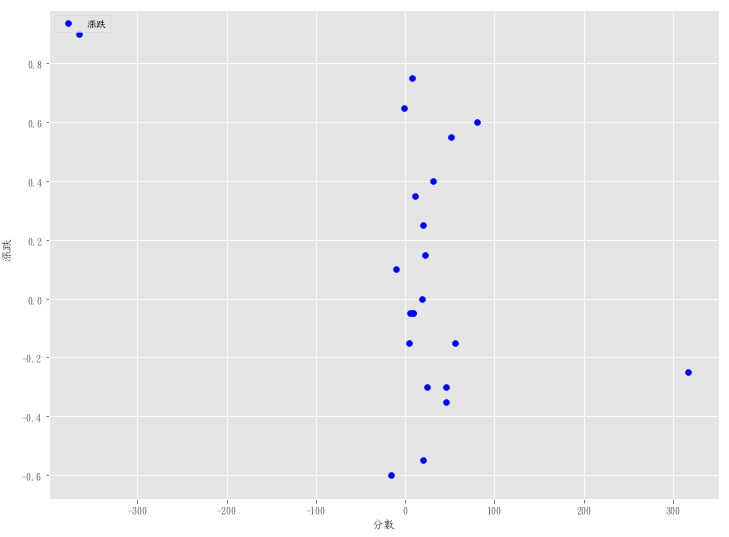

In [28]:
import matplotlib.pyplot as plt
#散點圖
plt.style.use('ggplot')
plt.figure(figsize=(12, 9))
font = {'family' : 'DFKai-SB',
'weight' : 'bold',
'size'  : '10'} #字型設定
plt.rc('font', **font) #字型設定 # pass in the font dict as kwargs
plt.rc('axes',unicode_minus=False) #字型設定
plt.scatter(ava_emotion_0054,stock_change_0054,color='b',label='漲跌')
#橫縱軸標籤
plt.legend(loc=2)
plt.xlabel('分數')
plt.ylabel('漲跌')
plt.show()

In [9]:
rDf=re_change_emo_0054_dict.corr()
print(rDf)

          emotion    change
emotion  1.000000 -0.102126
change  -0.102126  1.000000


In [9]:
#-------------整理出個股日期與 情緒 股價的lost  2330
ava_emotion_0054 = []
ava_emo_date_0054 = []
stock_change_0054 = []
ava_date_0054 = []
for r in stock_num_list:
    for u in range(len(all_stock_dict[r]["日期"])):
        all_stock_dict[r]["日期"][u] = str(all_stock_dict[r]["日期"][u]).replace('/','-',2)
        all_stock_dict[r]["日期"][u] = str(all_stock_dict[r]["日期"][u]).replace('107','2018')
        all_stock_dict[r]["日期"][u] = str(all_stock_dict[r]["日期"][u]).replace('108','2019')
        #print(all_stock_dict[r]["日期"][u])
for u in range(len(emotion_date_list)):
    if emotion_date_list[u] in all_stock_dict['2330']["日期"]:
        ava_emotion_0054.append(date_stock_dict[emotion_date_list[u]]['emotion_score'])
        ava_emo_date_0054.append(emotion_date_list[u])
for u in range(len(all_stock_dict['2330']["日期"])):
    if all_stock_dict['2330']["日期"][u] in ava_emo_date_0054:
        da = all_stock_dict['2330']['漲跌價差'][u]
        if '-' in da:
            da1 = da[1]+da[2]+da[3]+da[4]
            da1 = float(da1)
            da1 = da1*-1
            stock_change_0054.append(da1) 
        elif '+' in da:
            da1 = da[1]+da[2]+da[3]+da[4]
            da1 = float(da1)
            stock_change_0054.append(da1) 
        else:
            da1 = da[1]+da[2]+da[3]+da[4]
            da1 = float(da1)
            stock_change_0054.append(da1) 
print(len(ava_emotion_0054))
print(len(ava_emo_date_0054))
print(len(stock_change_0054))
#stock_change_0054 = all_stock_dict['0054']['漲跌價差']
print(stock_change_0054)

214
214
214
[2.5, 4.5, 0.5, -2.0, 0.5, 4.0, -1.0, -2.0, 1.5, 1.5, 13.0, 3.5, 0.0, -0.5, 0.5, 3.5, 1.0, 0.5, 2.0, -3.5, 2.5, -1.5, -4.0, 6.0, -0.5, -2.0, -4.5, 3.0, -2.0, -2.5, 0.5, 0.0, 1.5, 1.0, 2.5, -1.0, 1.5, 4.5, 9.5, 4.5, -7.5, 1.0, 0.5, 6.5, -3.0, 3.0, 0.5, -4.5, 0.5, -5.5, 6.0, -3.0, -3.5, 3.5, 2.0, 1.5, 2.0, 0.0, 1.5, -2.5, 0.5, -5.5, 2.5, -6.0, -4.0, -6.5, 0.5, -16.5, 9.5, -6.5, 6.5, 1.5, -2.0, -7.0, -0.5, -10.0, 1.5, 1.5, 0.5, 11.0, 1.5, 1.0, -1.5, -0.5, -0.5, 2.5, -5.5, 0.5, -4.0, 1.0, 2.5, -5.0, -4.0, -4.0, 1.0, 0.0, -0.5, 4.5, 1.0, 2.5, 2.5, -3.5, 9.5, -1.0, -8.0, -6.0, 1.0, -2.0, 3.5, 4.0, -0.5, -3.5, 1.0, -1.0, 3.0, -4.5, 2.5, -2.0, -1.5, -2.5, -1.0, 6.5, 2.5, -6.0, -4.0, -7.5, 5.0, -2.0, 4.5, 0.5, 4.5, -2.0, 2.5, -3.5, 3.0, -2.0, 2.5, 2.0, -2.5, 2.0, 3.5, 3.0, -6.5, -1.5, 7.0, 2.0, -1.0, -2.0, 0.0, 3.0, -1.0, 5.5, 2.0, 0.0, 1.5, 1.5, -0.5, -3.5, -2.5, 1.0, 0.0, -4.0, 0.5, 5.0, 1.5, -2.5, 4.5, 2.0, -0.5, 1.5, 3.5, 3.0, -7.0, 2.5, -2.5, 0.5, 3.5, 0.0, 0.5, 0.5, 6.5, 1.0, 

In [11]:
re_change_emo_0054_dict= {}
re_change_emo_0054_dict['emotion'] = ava_emotion_0054
re_change_emo_0054_dict['change'] =stock_change_0054
re_change_emo_0054_dict=OrderedDict(re_change_emo_0054_dict)
re_change_emo_0054_dict=pd.DataFrame(re_change_emo_0054_dict)
re_change_emo_0054_dict.head()
rDf=re_change_emo_0054_dict.corr()
print(rDf)

          emotion    change
emotion  1.000000 -0.138255
change  -0.138255  1.000000


所有開市日期的情緒與漲跌幅資料的散佈圖

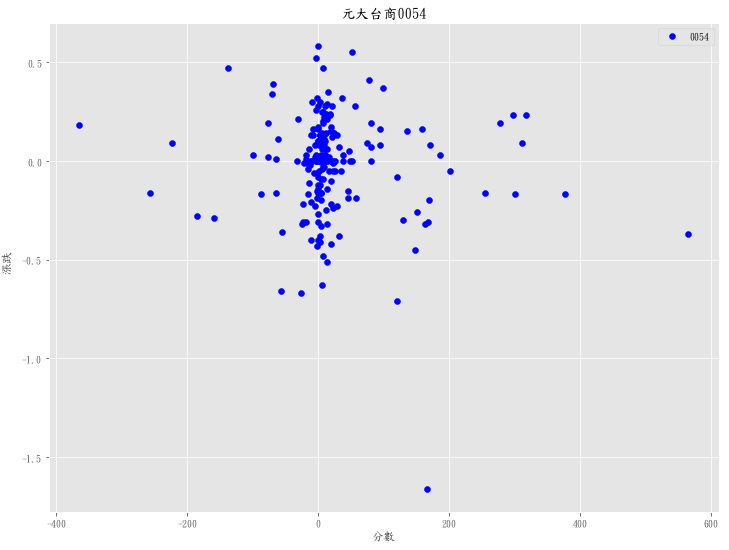

元大台商0054
          emotion    change
emotion  1.000000 -0.102126
change  -0.102126  1.000000


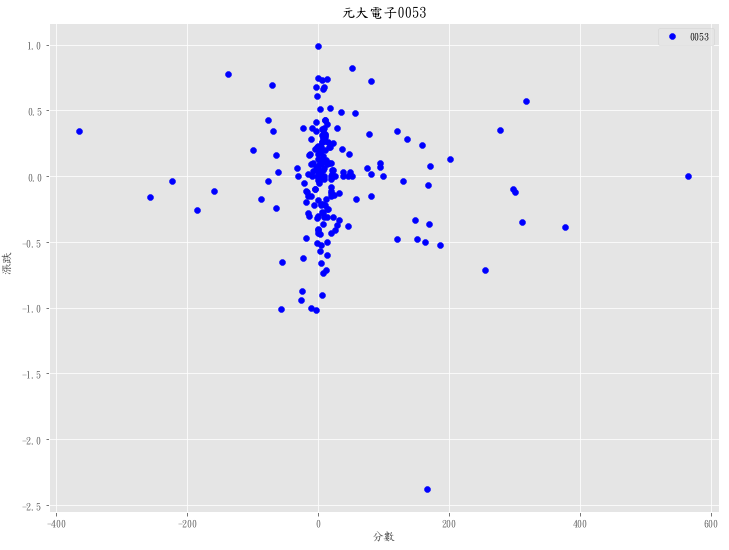

元大電子0053
         emotion  change
emotion   1.0000 -0.0961
change   -0.0961  1.0000


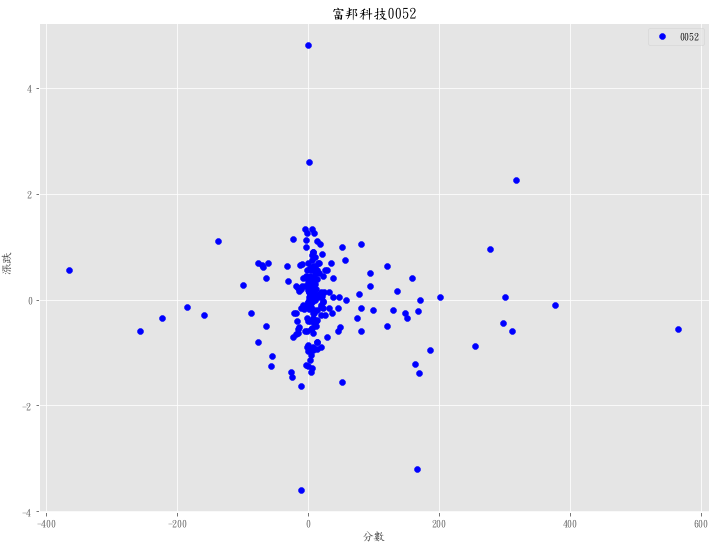

富邦科技0052
         emotion   change
emotion  1.00000 -0.05815
change  -0.05815  1.00000


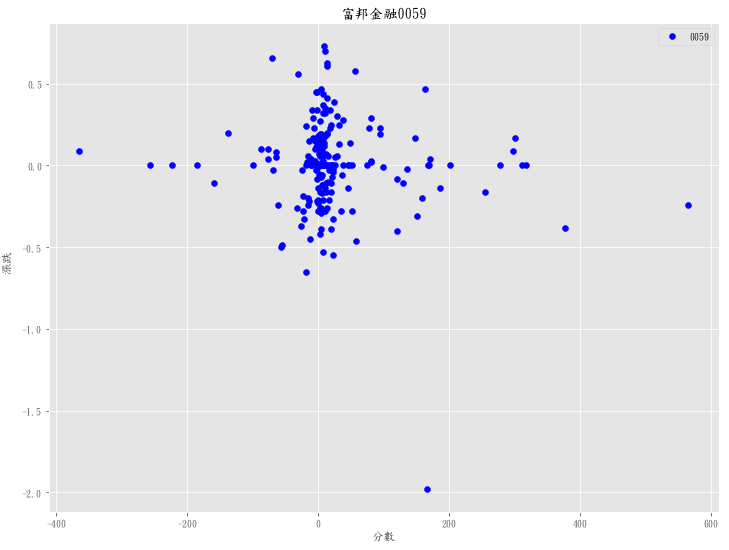

富邦金融0059
          emotion    change
emotion  1.000000 -0.110105
change  -0.110105  1.000000


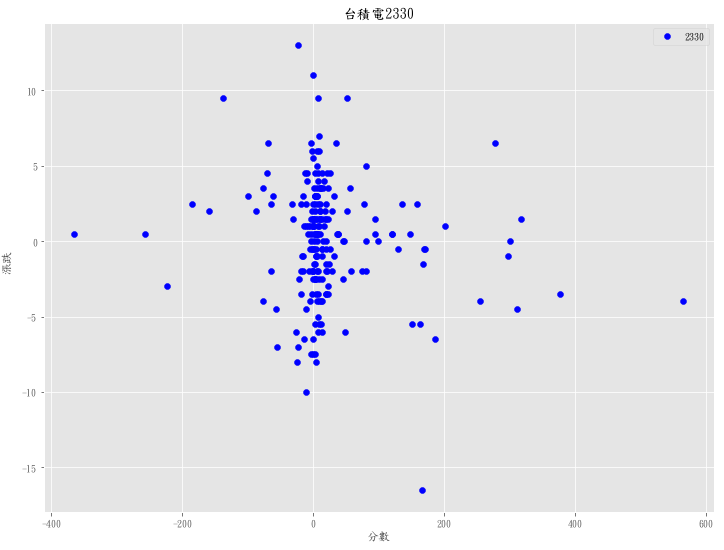

台積電2330
          emotion    change
emotion  1.000000 -0.138255
change  -0.138255  1.000000


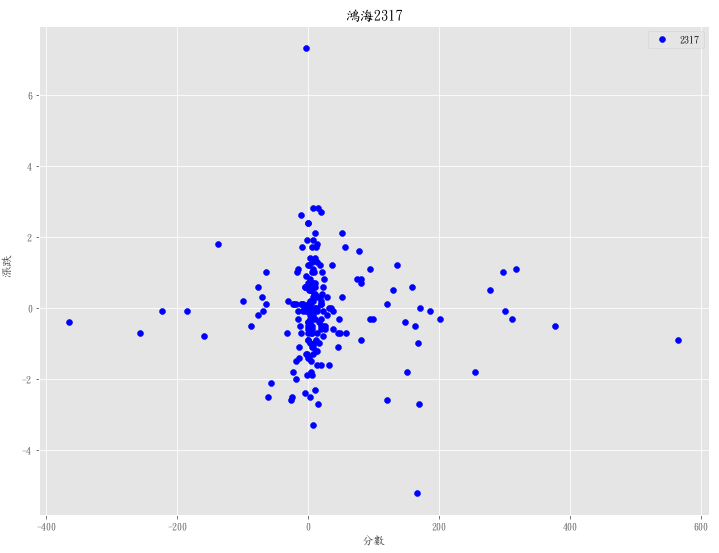

鴻海2317
          emotion    change
emotion  1.000000 -0.047525
change  -0.047525  1.000000


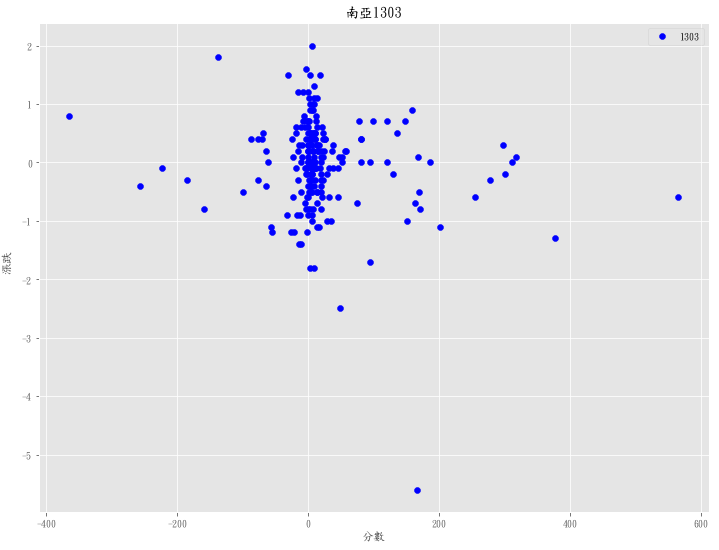

南亞1303
          emotion    change
emotion  1.000000 -0.156921
change  -0.156921  1.000000


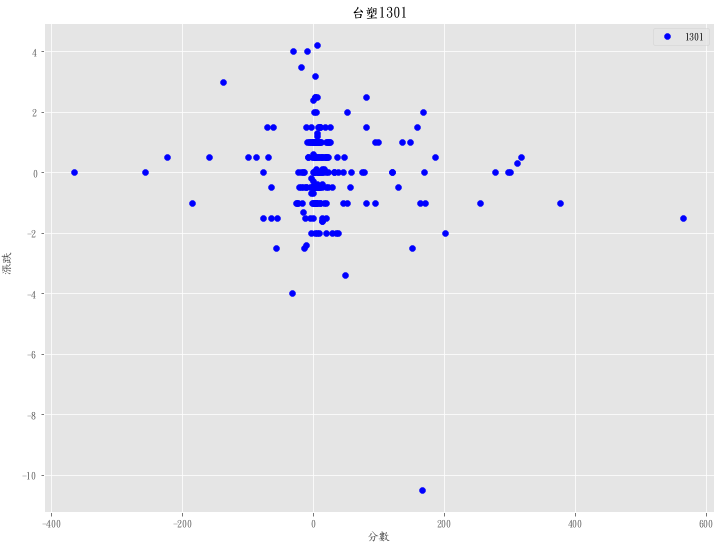

台塑1301
          emotion    change
emotion  1.000000 -0.115757
change  -0.115757  1.000000


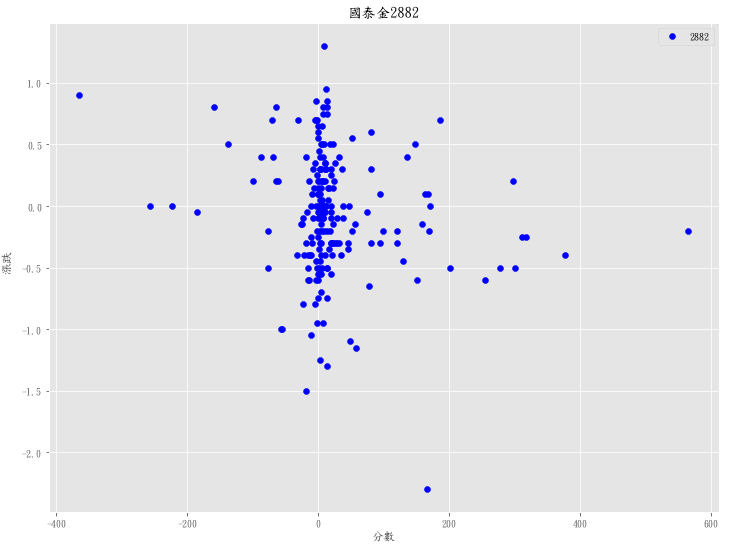

國泰金2882
          emotion    change
emotion  1.000000 -0.174599
change  -0.174599  1.000000


In [38]:
import warnings
from collections import OrderedDict
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
stock_name_list = ['元大台商0054','元大電子0053','富邦科技0052','富邦金融0059','台積電2330','鴻海2317','南亞1303','台塑1301','國泰金2882']
stock_num_list = ['0054','0053','0052','0059','2330','2317','1303','1301','2882']
for u in range(len(all_stock_dict[r]["日期"])):
    all_stock_dict[r]["日期"][u] = str(all_stock_dict[r]["日期"][u]).replace('/','-',2)
    all_stock_dict[r]["日期"][u] = str(all_stock_dict[r]["日期"][u]).replace('107','2018')
    all_stock_dict[r]["日期"][u] = str(all_stock_dict[r]["日期"][u]).replace('108','2019')
        #print(all_stock_dict[r]["日期"][u])
c = 0
for r in stock_num_list:
    ava_emotion_0054 = []
    ava_emo_date_0054 = []
    stock_change_0054 = []
    ava_date_0054 = []
    for u in range(len(emotion_date_list)):
        if emotion_date_list[u] in all_stock_dict[r]["日期"]:
            ava_emotion_0054.append(date_stock_dict[emotion_date_list[u]]['emotion_score'])
            ava_emo_date_0054.append(emotion_date_list[u])
    for u in range(len(all_stock_dict[r]["日期"])):
        if all_stock_dict[r]["日期"][u] in ava_emo_date_0054:
            da = all_stock_dict[r]['漲跌價差'][u]
            if '-' in da:
                da1 = da[1]+da[2]+da[3]+da[4]
                da1 = float(da1)
                da1 = da1*-1
                stock_change_0054.append(da1) 
            elif '+' in da:
                da1 = da[1]+da[2]+da[3]+da[4]
                da1 = float(da1)
                stock_change_0054.append(da1) 
            else:
                da1 = da[1]+da[2]+da[3]+da[4]
                da1 = float(da1)
                stock_change_0054.append(da1) 
#     print(len(ava_emotion_0054))
#     print(len(ava_emo_date_0054))
#     print(len(stock_change_0054))
    #stock_change_0054 = all_stock_dict['0054']['漲跌價差']
    #print(stock_change_0054)
    import matplotlib.pyplot as plt
    #散點圖
    plt.style.use('ggplot')
    plt.figure(figsize=(12, 9))
    font = {'family' : 'DFKai-SB',
    'weight' : 'bold',
    'size'  : '10'} #字型設定
    plt.rc('font', **font) #字型設定 # pass in the font dict as kwargs
    plt.rc('axes',unicode_minus=False) #字型設定
    plt.scatter(ava_emotion_0054,stock_change_0054,color='b',label=str(r))
    #橫縱軸標籤
    plt.legend(loc=2)
    plt.xlabel('分數')
    plt.ylabel('漲跌')
    plt.title(str(stock_name_list[c]))
    na = 'C:\\Users\\Will\\Desktop\\datascience_upload\\專案\\情緒與股市散佈圖\\所有開市日'+str(r)+'.png'
    plt.savefig(na)
    plt.legend()
    plt.show()
    re_change_emo_0054_dict= {}
    re_change_emo_0054_dict['emotion'] = ava_emotion_0054
    re_change_emo_0054_dict['change'] =stock_change_0054
    re_change_emo_0054_dict=OrderedDict(re_change_emo_0054_dict)
    re_change_emo_0054_dict=pd.DataFrame(re_change_emo_0054_dict)
    re_change_emo_0054_dict.head()
    rDf=re_change_emo_0054_dict.corr()
    print(stock_name_list[c])
    print(rDf)
    c += 1

所有開市日期的情緒與漲跌幅資料的相關係數過低，因此我們以周為單位整理出情緒分數絕對值較高的週數

In [15]:
import datetime,time
dur_date_stock_dict = {}
dur_emotion_date_list = []
dur = [
[datetime.date(2018, 7, 11),
  datetime.date(2018, 7, 12),
  datetime.date(2018, 7, 13),
  datetime.date(2018, 7, 14),
  datetime.date(2018, 7, 15)],

 [datetime.date(2018, 10, 31),
  datetime.date(2018, 11, 1),
  datetime.date(2018, 11, 2),
  datetime.date(2018, 11, 3),
  datetime.date(2018, 11, 4)],

 [datetime.date(2018, 11, 30),
  datetime.date(2018, 12, 1),
  datetime.date(2018, 12, 2),
  datetime.date(2018, 12, 3),
  datetime.date(2018, 12, 4)],

 [datetime.date(2019, 2, 11),
  datetime.date(2019, 2, 12),
  datetime.date(2019, 2, 13),
  datetime.date(2019, 2, 14),
  datetime.date(2019, 2, 15)],

[datetime.date(2019, 3, 10),
  datetime.date(2019, 3, 11),
  datetime.date(2019, 3, 12),
  datetime.date(2019, 3, 13),
  datetime.date(2019, 3, 14)],

 [datetime.date(2019, 5, 7),
  datetime.date(2019, 5, 8),
  datetime.date(2019, 5, 9),
  datetime.date(2019, 5, 10),
  datetime.date(2019, 5, 11)]]
for i in range(len(dur)):
    for u in range(len(dur[i])):
        date = dur[i][u]
        date = date.strftime('%Y-%m-%d')
        #print(date,type(date))
        dur_date_stock_dict[date] = date_stock_dict[date]
        dur_emotion_date_list.append(date)
print(dur_emotion_date_list)

['2018-07-11', '2018-07-12', '2018-07-13', '2018-07-14', '2018-07-15', '2018-10-31', '2018-11-01', '2018-11-02', '2018-11-03', '2018-11-04', '2018-11-30', '2018-12-01', '2018-12-02', '2018-12-03', '2018-12-04', '2019-02-11', '2019-02-12', '2019-02-13', '2019-02-14', '2019-02-15', '2019-03-10', '2019-03-11', '2019-03-12', '2019-03-13', '2019-03-14', '2019-05-07', '2019-05-08', '2019-05-09', '2019-05-10', '2019-05-11']


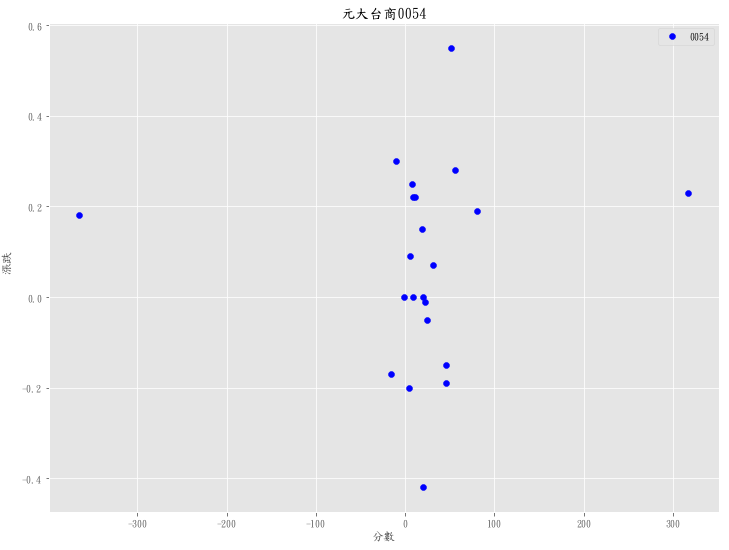

元大台商0054
          emotion    change
emotion  1.000000  0.049554
change   0.049554  1.000000


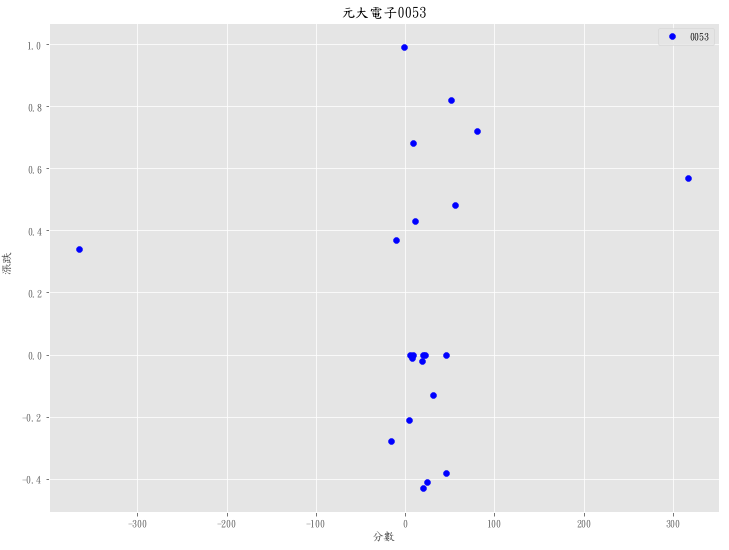

元大電子0053
          emotion    change
emotion  1.000000  0.094298
change   0.094298  1.000000


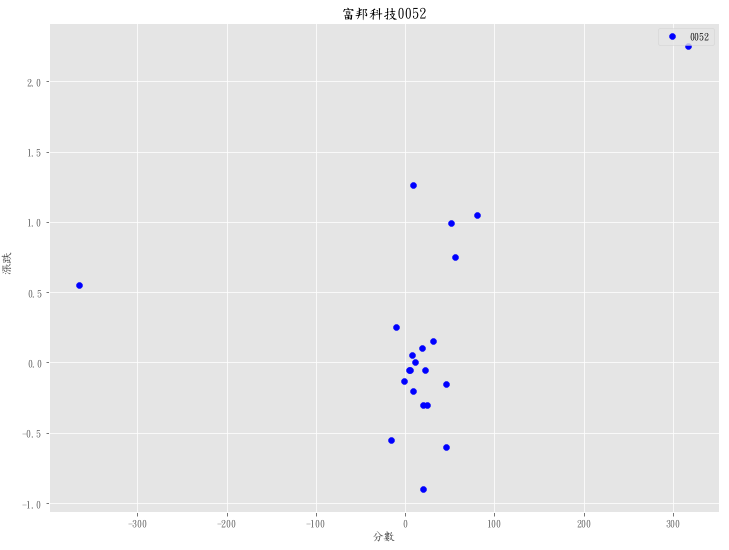

富邦科技0052
          emotion    change
emotion  1.000000  0.352521
change   0.352521  1.000000


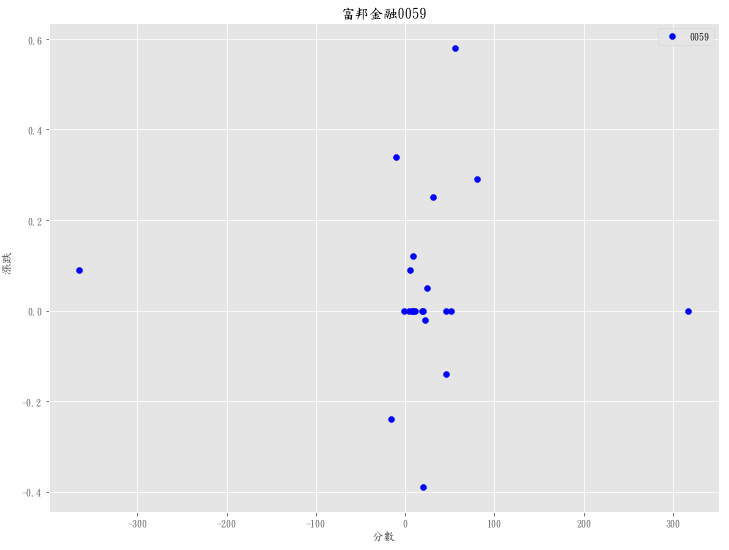

富邦金融0059
          emotion    change
emotion  1.000000  0.003264
change   0.003264  1.000000


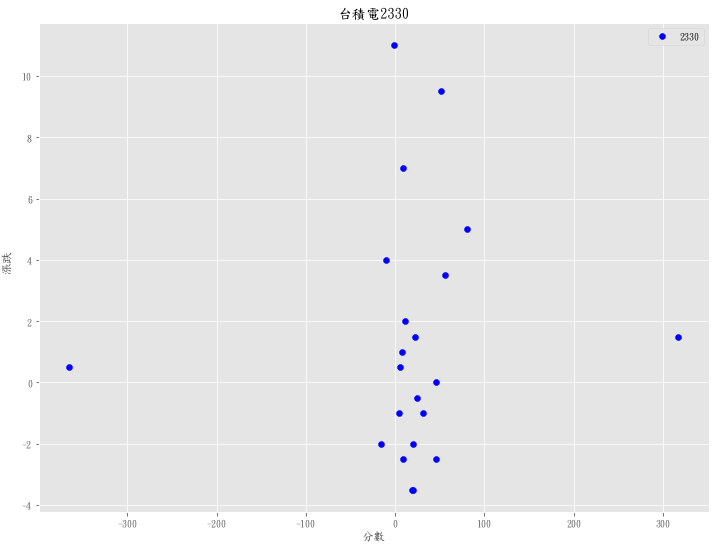

台積電2330
          emotion    change
emotion  1.000000  0.068567
change   0.068567  1.000000


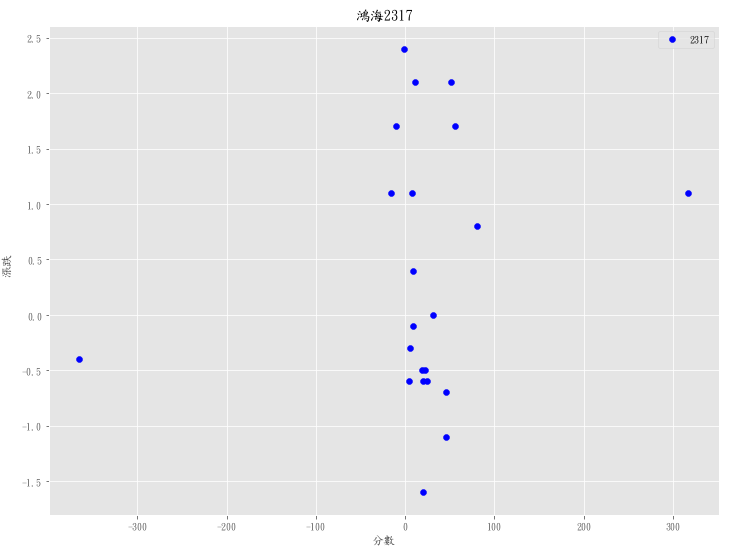

鴻海2317
          emotion    change
emotion  1.000000  0.173869
change   0.173869  1.000000


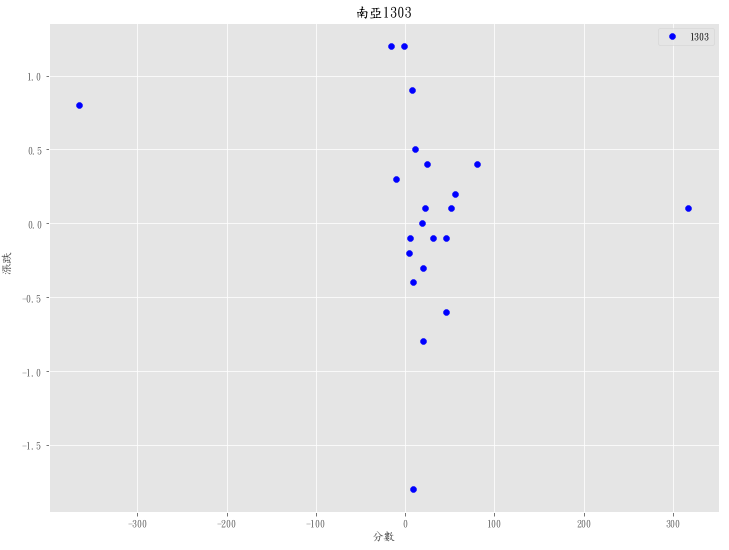

南亞1303
          emotion    change
emotion  1.000000 -0.209331
change  -0.209331  1.000000


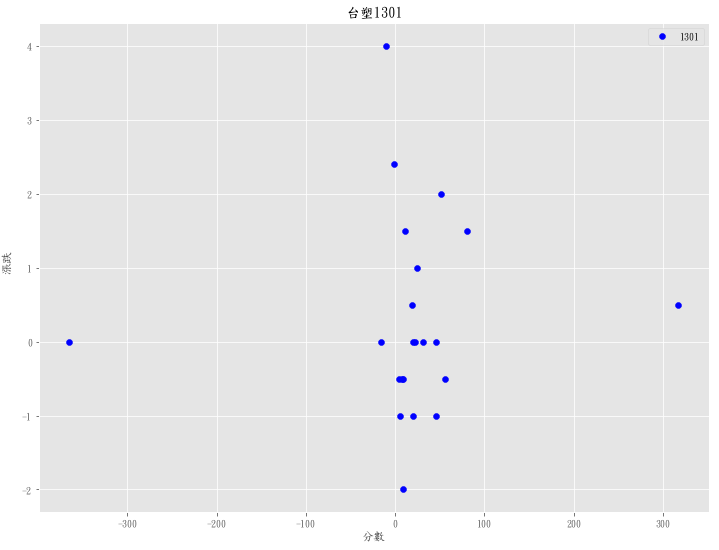

台塑1301
          emotion    change
emotion  1.000000  0.048644
change   0.048644  1.000000


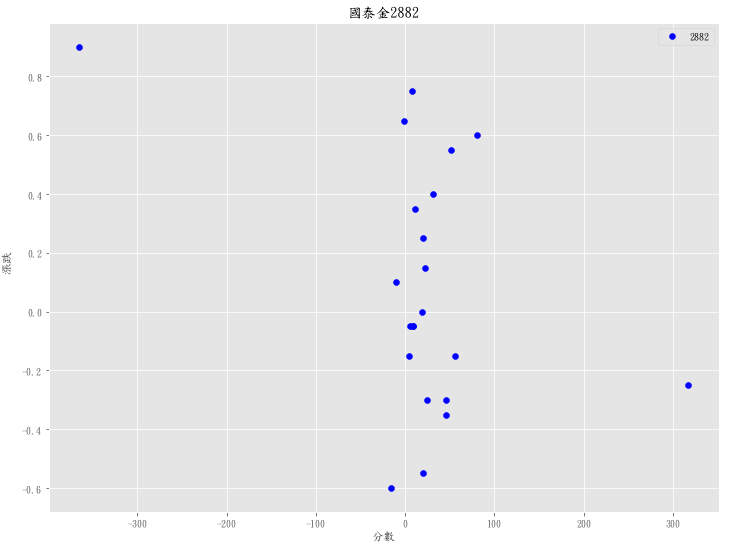

國泰金2882
          emotion    change
emotion  1.000000 -0.399488
change  -0.399488  1.000000


In [36]:
stock_num_list = ['0054','0053','0052','0059','2330','2317','1303','1301','2882']
stock_name_list = ['元大台商0054','元大電子0053','富邦科技0052','富邦金融0059','台積電2330','鴻海2317','南亞1303','台塑1301','國泰金2882']
for u in range(len(all_stock_dict[r]["日期"])):
    all_stock_dict[r]["日期"][u] = str(all_stock_dict[r]["日期"][u]).replace('/','-',2)
    all_stock_dict[r]["日期"][u] = str(all_stock_dict[r]["日期"][u]).replace('107','2018')
    all_stock_dict[r]["日期"][u] = str(all_stock_dict[r]["日期"][u]).replace('108','2019')
        #print(all_stock_dict[r]["日期"][u])
c= 0
for r in stock_num_list:
    ava_emotion_0054 = []
    ava_emo_date_0054 = []
    stock_change_0054 = []
    ava_date_0054 = []
    for u in range(len(dur_emotion_date_list)):
        if dur_emotion_date_list[u] in all_stock_dict[r]["日期"]:
            ava_emotion_0054.append(date_stock_dict[dur_emotion_date_list[u]]['emotion_score'])
            ava_emo_date_0054.append(dur_emotion_date_list[u])
    for u in range(len(all_stock_dict[r]["日期"])):
        if all_stock_dict[r]["日期"][u] in ava_emo_date_0054:
            da = all_stock_dict[r]['漲跌價差'][u]
            if '-' in da:
                da1 = da[1]+da[2]+da[3]+da[4]
                da1 = float(da1)
                da1 = da1*-1
                stock_change_0054.append(da1) 
            elif '+' in da:
                da1 = da[1]+da[2]+da[3]+da[4]
                da1 = float(da1)
                stock_change_0054.append(da1) 
            else:
                da1 = da[1]+da[2]+da[3]+da[4]
                da1 = float(da1)
                stock_change_0054.append(da1) 
    #print(len(ava_emotion_0054))
    #print(len(ava_emo_date_0054))
    #print(len(stock_change_0054))
    #stock_change_0054 = all_stock_dict['0054']['漲跌價差']
    #print(stock_change_0054)
    import matplotlib.pyplot as plt
    #散點圖
    plt.style.use('ggplot')
    plt.figure(figsize=(12, 9))
    font = {'family' : 'DFKai-SB',
    'weight' : 'bold',
    'size'  : '10'} #字型設定
    plt.rc('font', **font) #字型設定 # pass in the font dict as kwargs
    plt.rc('axes',unicode_minus=False) #字型設定
    plt.scatter(ava_emotion_0054,stock_change_0054,color='b',label=str(r))
    #橫縱軸標籤
    plt.legend(loc=2)
    plt.xlabel('分數')
    plt.ylabel('漲跌')
    plt.title(str(stock_name_list[c]))
    na = 'C:\\Users\\Will\\Desktop\\datascience_upload\\專案\\情緒與股市散佈圖\\區間'+str(r)+'.png'
    plt.savefig(na)
    plt.legend()
    plt.show()
    re_change_emo_0054_dict= {}
    re_change_emo_0054_dict['emotion'] = ava_emotion_0054
    re_change_emo_0054_dict['change'] =stock_change_0054
    re_change_emo_0054_dict=OrderedDict(re_change_emo_0054_dict)
    re_change_emo_0054_dict=pd.DataFrame(re_change_emo_0054_dict)
    re_change_emo_0054_dict.head()
    rDf=re_change_emo_0054_dict.corr()
    print(stock_name_list[c])
    print(rDf)
    c += 1

若所有開市日期的情緒與漲跌幅資料的相關係數過低，
若情緒分數絕對值較高的日期來看漲跌幅，可以發現相關係數雖然也是偏低，但會比原先與所有開市日期比較的相關係數高0.2~0.4